# IMDB Sentiment Analysis with Logistic Regression, k-Nearest Neighbor and Support Vector Machine Model 

In this project, first the dataset of the Internet Movie Database (IMDb) movie reviews will be studied on. Dataset contains huge number of reviews (approximately 50000) those are both positive and negative reviews. The negative reviews have a score lower than rating point 4 out of 10, and positive reviews have a score higher than 7. The main goal of the project is to classify whether a review is positive or negative with using at least two different architecture from the following set: Suppor Vector Machine, Logistic Regression and Naive Bayes.

#### Dataset to be used :

https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data

#### References 

Dey, L., Chakraborty, S., Biswas, A., Bose, B., and Tiwari, S. (2016). Sentiment analysis of
review datasets using na ̈ıve bayes‘ and k-nn classifier. International Journal of Information
Engineering and Electronic Business, 8:54–62.

Ramadhan, N. G. and Ramadhan, T. I. (2022). Analysis sentiment based on imdb aspects from
movie reviews using svm. Sinkron : jurnal dan penelitian teknik informatika, 7(1):39–45.
Ramadhan and Ramadhan (2022) Dey et al. (2016)
1

**Note: Other references of code and analysis will be given within the implemaentaition**

### OUTLINE ###

#### PART 1

 * Part 1 contains data pre-process.
 * It will show how and why we prepare data for the model implemantaion.

#### PART 2 
 
 * Part 2 contains model implementations using Scikit Learn library and a little work for KNN parameter optmization.

#### PART 3 

 * Part 3 contains model implementations and results with Dimensionality Reduction Tecniques and Hyperparameter Optimization
 
#### PART 4 

 * Part 4 contains hand-coded model implementations to the data prepared with Dimensionality Reduction and the results.

### PART 1: Data Pre-Process

* Data preprocessing is important to see what kind of data we have to deal with and for preparing those data to be implemented into the models. Our data is a text-based data

* The first part of data pre-process aims at reducing the complexity by manipulating our text-based data, which enables to increase its generalization capabilities and so accuracy.

* Main steps of text manipulations are Contractions Expansion, Removing HTML Tags, Lower Case Conversion, Removing Stopwords, Removing Numbers, Removing Frequent Words, Word Tokenization, Lemmatization, Removing Punctuation.

* The other part of the data preprocess contains the vectorization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data["sentiment"]=data["sentiment"].map({"positive":1,"negative":0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
#data.shape, data.dtypes,data.isnull().any()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


The column ‘review’ contains 50,000 non-null entries with a datatype object. The column ‘sentiment’ has 50,000 non-null entries with a datatype int64.

The ‘sentiment’ column contains class sentiment for each review. If it is 0, then it is a negative review. If the it is 1, then it is a positive review. Lets see the number of occurrences of each and plot.



0    25000
1    25000
Name: sentiment, dtype: int64

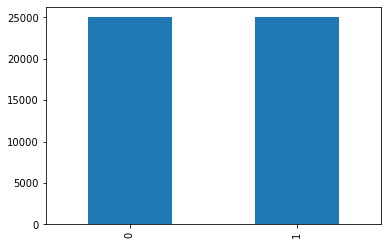

In [4]:
data.sentiment.value_counts().plot(kind="bar")
data.sentiment.value_counts()

### Text Manipulation
Text preprocessing is an important part of any problem as we have, Natural Language Problems. I create many function for text manipulation to reduce complexity as said above.The operations are explained below:

* **Contractions Expansion:** This operation changes some contracted word to the open form. Such as: "aren't" → 'are not'. This is required for the other operations going well.
* **Removing HTML Tags:** This removes HTML tags like < div >< /div > and < br/ > from the text.
* **Word Tokenization:** This turns the large text into separate tokens, basically single words.
* **Lower Case Conversion:** This changes all the upper case characters into lower case. Upper and lower case shouldnt make any difference for our model, “A” and “a” should be same thing for our model.
* **Removing Numbers:** This removes all the numbers in the text. Numbers do not play a significant role for the analysis of movie reviews.
* **Removing Stopwords:** This removes english language stopwords like ‘me’, ‘our’, ‘where’, ‘what’.. etc. from the text.
* **Removing Frequent Words:** This removes the most frequently occurring words in data, because frequent words don’t provide any significant difference among the inputs, like the word “movie”.
* **Lemmatization:** This enables using the base forms of words. For example, “writing” → “write” and “cats” → “cat”.
* **Removing Punctuation:** This removes all the punctuation like !”\’(), from the text.

In [5]:
# Contractions Expansion
import contractions
contractions_dict = contractions.contractions_dict
#contractions_dict
def contraction_expansion(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.replace(key, value)
        return x
    else:
        return x
data["review"]=data["review"].apply(lambda x : contraction_expansion(x))
data.iloc[0]["review"]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the 

In [6]:
#Remove html tags
import re
def remove_html(element):
    html_removed = re.sub(re.compile('<.*?>'),'',element)
    return html_removed
data["review"]=data["review"].apply(lambda x : remove_html(x))
#data.iloc[0]["review"]

In [7]:
#Remove Punctuation
from string import punctuation
def remove_punct(element):
    element_without_punct = [i for i in element if not i in punctuation]
    element_without_punct=''.join(element_without_punct)
    return element_without_punct
data["review"]=data["review"].apply(lambda x:remove_punct(x))

In [8]:
#Tokenize
import nltk
nltk.download('punkt')
from nltk import word_tokenize
data["review"]=data["review"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /home/taylan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Lower Case Transformation
def lower_case(element):
    lower_case_element = element.lower()
    return lower_case_element
data["review"]=data["review"].apply(lambda x : [lower_case(i) for i in x])
#data.iloc[0]["review"]

In [10]:
# Removing Numbers
def number_remove(element):
    element_without_numbers = [i for i in element if not i.isdigit()]
    #Yes_number = element.isdigit() # if it it is a number, it returns True
    return element_without_numbers
data["review"]=data["review"].apply(lambda x:number_remove(x))
#data.iloc[0]["review"]

In [11]:
# Remove Stopwords
from nltk.corpus import stopwords
stops=stopwords.words("english")
def remove_stop(element):
    element_without_stop =[i for i in element if i not in stops]
    return element_without_stop
data["review"]=data["review"].apply(lambda x:remove_stop(x))

In [12]:
# Remove Frequent Words 
temp = data['review'].apply(lambda words: " ".join(words))
freq = pd.Series(temp).value_counts()[:10]
data['review'] = data['review'].apply(lambda words: [x for x in words if x not in freq.keys()])
data.iloc[0]["review"]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 

In [13]:
# Lemmetization 

import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmetize(element):
    
    lemmatized_output = [lemmatizer.lemmatize(w) for w in element]
    lemmatized_output = " ".join(lemmatized_output)
    
    return lemmatized_output
data["review"]=data["review"].apply(lambda x: lemmetize(x))

[nltk_data] Downloading package wordnet to /home/taylan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Vectorization 

There is no model that can understand the text-based data, so we need to transform our text-based data into the for of that the models can understand. There are two main approches for this, which are Count Vectorizer and Term Frequency Inverse Document Frequency(TF-IDF) Vectorizer. Count Vectorizer gives number of frequency with respect to index of vocabulary. On the other hand, Tf-Idf consider overall documents of weight of words. For more details you can visit page : https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a 

Count vectorizer has some disadvantages as follows: inability in identifying more important and less important words for the analysis, consideration of words that are found mostly in a corpus as the most statistically significant word. On the other side, Tf-Idf is a statistic that is based on the frequency of a word in the corpus. It also provides a numerical representation of how important a word is for statistical analysis. TF-IDF is better than Count Vectorizers since it considers both the frequency of words present and  the importance of the words in the text which provides us working with less input dimension and important words.

Also Dimensionality Reductions tecniques can be applied easier for Tf-Idf, so the chosen one is it. All tools for vectorization, model implementation and measuring model performance are got from scikit-learn library.

In [14]:
# All tools for vectorization, model implementation and measuring model performance here:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

In [24]:
# Vectorization and Train-Test Split
X = data['review']
y = data['sentiment']
tfidf = TfidfVectorizer()#max_features=300)#max_features=10) --> No Dimensionality Reduction for now.
X = tfidf.fit_transform(X)
#y=tfidf.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**We see very high dimensional case!!!**

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 208350), (10000, 208350), (40000,), (10000,))

In [26]:
#x_train_frame = pd.DataFrame(x_train.toarray())
#x_train_frame

## PART 2 : Model Implementation using Scikit-Learn Library

#### 1) Logistic Regression

* dual: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

* max_iter: default=100 Maximum number of iterations of the optimization algorithm.

In [27]:
logistic_model = LogisticRegression(max_iter=200)
scores = cross_val_score(logistic_model, x_train, y_train, cv=10, n_jobs=4)
scores

array([0.89175, 0.89125, 0.894  , 0.88925, 0.89025, 0.89475, 0.883  ,
       0.88775, 0.8865 , 0.8905 ])

In [28]:
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)


(0.894, 0.932475)

In [29]:
y_pred = logistic_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[4367,  594],
       [ 466, 4573]])

#### 2) K-Neares Neighbour

* n_neighbours : determine number of neighbours, k.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[3434, 1527],
       [ 848, 4191]])

In [32]:
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7625, 0.882975)

**There is an overfitting problem here !!**

**The value of k in the KNN algorithm is related to the error rate of the model. A small value of k could lead to overfitting as well as a big value of k can lead to underfitting. Also, dimesionality reduction can be help to perform better!!** 

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[3476, 1485],
       [ 790, 4249]])

In [34]:
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7725, 0.856125)

**Better but not enough!!**

In [35]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[3806, 1155],
       [ 938, 4101]])

In [36]:
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7907, 0.8368)

In [37]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[3545, 1416],
       [ 684, 4355]])

In [38]:
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.79, 0.8233)

In [39]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[3773, 1188],
       [ 921, 4118]])

In [40]:
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7891, 0.831625)

#### 3) Support Vector Machine

It doesnt converge for time 1 hour. It needs dimensionality reduction teqniques!!!

In [31]:
''''from sklearn import svm

%%time
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-31-7b4b0c1d70bc>, line 7)

# PART 3 : Dimensionality Reduction and Hyperparemeter Optimization for Models

* In this part again Scikit Learn Library will be used for model implementation
* First Dimensionality Reduction teqniques are used and then model implementation.
* At the end, comparision with model results that created without dimensionality reduction.

### TF-IDF Vectorizer

* It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. (see more information here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf )

* max_features : The purpose of max_features is to limit the number of features (words) from the dataset for which we want to calculate the TF-IDF scores. This is done by choosing the features based on term frequency across the corpus. More info : https://www.deepwizai.com/projects/how-to-correctly-use-tf-idf-with-imbalanced-data

* So max_feature paremeter for TfidfVectorizer is a teqnique for reduction od dimension, so complexity, it is a very essential dimensinality reduction tecniques like our text processing functions. 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['review']
y = data['sentiment']
tfidf = TfidfVectorizer(max_features=300)
X = tfidf.fit_transform(X)

In [42]:
X.shape,y.shape

((50000, 300), (50000,))

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Logistic Model

* Before accuracy: (0.894, 0.932475) for:(test accuracy,train accuracy)

In [44]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

(0.8131, 0.816875)

* Current  accuracy : (0.8807, 0.89935) overfittin is better. Since The feature number decreases it didnt give better test result. with the increasing number of max_feature paremeter it can give better result than the before test accuracy.

### KNN Model 

* Before accuracies with some spesific k and the form (test accuracy,train accuracy)
  * k=3 (0.7625, 0.882975)
  * k=5 (0.7725, 0.856125)
  * k=10 (0.7907, 0.8368)

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.668, 0.931225)

In [46]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.6927, 0.835)

In [47]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7207, 0.79205)

* After accuracies with some spesific k and the form (test accuracy,train accuracy)
  * k=3 (0.7293, 0.85995)
  * k=5 (0.7358, 0.830275)
  * k=10 (0.7614, 0.81395)

### SVM Model 

* Before: It didint give a result in reasonable time.

In [48]:
from sklearn import svm


clf = svm.SVC()
clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#confusion_matrix(y_test,y_pred)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.927975, 0.8185)

In [49]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)*100 

In [50]:
accuracy

81.85

* After : It gave result but, again train score higher than test score , (0.885,0.976), form of (test accuracy,train accuracy)

### Principal Component Analysis and Tf-Idf

TF-IDF is a scoring method that assigns a score to each word in the sentence. The score is high if the word does not commonly occur in all the reviews but occurs frequently overall. For example, the word course occurs frequently, but it occurs in almost every other review. So TF-IDF score for that word would below. On the other hand, the word poor occurs frequently and is specific to only negative reviews. So its score is higher.

So for every review, we have fixed length TF-IDF vector. The length of the vector is the size of the vocabulary.

How to reduce dimensionality, lets use Principial Component Analysis(PCA). What is PCA? 

PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points. 

Links:

https://towardsdatascience.com/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57
https://en.wikipedia.org/wiki/Principal_component_analysis

In [51]:
vectorizer = TfidfVectorizer(max_features=5000) # for default Unable to allocate 77.6 GiB for an array with shape (50000, 208350) and data type float64
reviews = list(data['review'])                  # so set max_feature 
labels = data['sentiment']

tfidf_reviews = vectorizer.fit_transform(reviews)

In [52]:
tfidf_array = tfidf_reviews.toarray()
print("Shape of the array:",tfidf_array.shape)

Shape of the array: (50000, 5000)


In [53]:

print("Percentage of zeros:",
      np.count_nonzero(tfidf_array==0)/(tfidf_array.shape[0]*tfidf_array.shape[1])*100)
#only 0.078% of the array elements are non zero. Such a waste of space!

Percentage of zeros: 98.4765016


In [54]:
from sklearn.decomposition import PCA
NUM_COMPONENTS = 300
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit_transform(tfidf_array)

In [55]:
reduced.shape

(50000, 300)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(reduced, labels, test_size = 0.2, random_state=42)

In [57]:
x_train.shape

(40000, 300)

In [58]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

(0.87, 0.87245)

In [59]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7087, 0.7817)

In [60]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#confusion_matrix(y_test,y_pred)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.9493, 0.879)

### Very Simple way of avoiding Overfitting:Reducing Training Samples

* Lets try reducing training samples, it can prevent model to learn exesively.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
reviews = data['review'].iloc[:25000]
label = data['sentiment'].iloc[:25000]
tfidf = TfidfVectorizer(max_features=5000)
tfidf_reviews = tfidf.fit_transform(reviews)

In [62]:
tfidf_array = tfidf_reviews.toarray()
print("Shape of the array:",tfidf_array.shape)

Shape of the array: (25000, 5000)


In [63]:
from sklearn.decomposition import PCA
NUM_COMPONENTS = 300
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit_transform(tfidf_array)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(reduced, label, test_size = 0.2, random_state=42)

In [65]:
x_train.shape, x_test.shape,y_train.shape

((20000, 300), (5000, 300), (20000,))

In [66]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

(0.8632, 0.87355)

In [67]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7068, 0.78685)

In [68]:
from sklearn import svm


clf = svm.SVC()
clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#confusion_matrix(y_test,y_pred)
clf.score(x_test,y_test), clf.score(x_train,y_train)

(0.865, 0.9536)

### Pre-Results

* 1) Without any Dimensionality Reduction, we have very high demsional feature space. Our training input x_train.shape : (40000, 208350). And the models gives results as follows, in  the order of test accuracy and train accuracy:

   * Logistic Model Result :
   
       * (0.894, 0.932475)
       
   * KNN Model Results for different k values:
   
       * k=3 : (0.7625, 0.882975)
       * k=5 : (0.7725, 0.856125)
       * k=10 : (0.7907, 0.8368)
       * k=12 : (0.7891, 0.831625)
       * k=15 : (0.79, 0.8233)
       
   * SVM Model Resul :
   
       * It didnt give result in a reasonable time.
       

* 2) With an simple complexity reduction by directly reducing feauture number using paremeter max_feature of Tf-Idf Vectorizer as explained above. Our training input x_train.shape : (40000, 300) The model gives results as follows, in  the order of test accuracy and train accuracy:

   * Logistic Model Result :
   
       * (0.8131, 0.816875)
       
   * KNN Model Results for different k values:
   
       * k=3 (0.7293, 0.85995)
       * k=5 (0.7358, 0.830275)
       * k=10 (0.7614, 0.81395)
       
   * SVM Model Result :
   
       * (0.885,0.976)



* 3) Dimesion Reduction with Principal Component Analysis and Tf-Idf. Our training input x_train.shape : (40000,300)

   * Logistic Model Result :
   
       * (0.87, 0.871975)
       
   * KNN Model Results for different k values:
   
       * k=10 (0.715, 0.78515)
       
   * SVM Model Result :
   
       * (0.8799, 0.9498)
       
* 4) Reducing Training Samples for avoiding Overfitting. Our training input x_train.shape : (20000, 200). It converges faster as expected.

   * Logistic Model Result :
   
       * (0.8598, 0.87155)
       
   * KNN Model Results for different k values:
   
       * k=10 (0.707, 0.78825)
       
   * SVM Model Result :
   
       * (0.8632, 0.9531)






### Comment on Pre-Results

* Dimesionality reduction leads to models perform faster, SVM converges but there is an overfitting problem even though test accuracy results are satifactory. Differen complexity reduction teqniques are performed and all gave the same overfitting result. Just for Logistic Regression model, we can say there is no overfitting.

* There can be many reasons for overfitting for each model. Consideration of that will be given later as in the topic of Possible Reason of Overfitting.

* As well as this, increasing k until some optimal point, it gives better result. It will be considered in hyperparameter optimization part. Hyperparemeter optimization may also reduce overfitting.

* Best performance is shown by Logistic Regression, then SVM and the worst is KNN model. 



### OverFitting for Models 

* KNN https://online.stat.psu.edu/stat508/lesson/9/9.3

    * https://www.baeldung.com/cs/k-nearest-neighbors
    
    * Smoothing. To prevent overfitting, we can smooth the decision boundary by K nearest neighbors.
    
    * The amount of computation can be intense when the training data is large since the distance between a new data point and every training point has to be computed and sorted.

    * Feature standardization is often performed in pre-processing. Because standardization affects the distance, if one wants the features to play a similar role in determining the distance, standardization is recommended. However, whether to apply normalization is rather subjective. One has to decide on an individual basis for the problem in consideration.

    * The only parameter that can adjust the complexity of KNN is the number of neighbors k. The larger k is, the smoother the classification boundary. Or we can think of the complexity of KNN as lower when k increases.
    
    * It's main disadvantages are that it is quite computationally inefficient and its difficult to pick the “correct” value of K. 
    
    * And also very high k can lead underfitting. Thats why it has an optimal point.
    
    
* Logistic Regression http://eointravers.com/post/logistic-overfit/
  
  * Sometimes, you end up with situations where the model wants to predict y=1  or y=0 . This happens when it’s possible to draw a straight line through your data so that every y=1 on one side of the line, and 0 on the other. This is called perfect separation.

  *  To do this, it must set the regression weights,  as large as possible. In theory, the model could fit the data if you could set wights as large as possible, but your software can’t do that. Instead, it iteratively tries higher and higher values until it reaches values that are too large for your computer to store.
  
  * The more predictors you have (the higher the dimensionality), the more likely it is that it will be possible to perfectly separate the two sets of values. As a result, overfitting becomes more of an issue when you have many predictors.
  
  
* SVM Model https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality

  *  In practice, the reason that SVMs tend to be resistant to over-fitting, even in cases where the number of attributes is greater than the number of observations, is that it uses regularization. They key to avoiding over-fitting lies in careful tuning of the regularization parameter, C, and in the case of non-linear SVMs, careful choice of kernel and tuning of the kernel parameters.

  * The SVM is an approximate implementation of a bound on the generalization error, that depends on the margin (essentially the distance from the decision boundary to the nearest pattern from each class), but is independent of the dimensionality of the feature space (which is why using the kernel trick to map the data into a very high dimensional space isn't such a bad idea as it might seem). So in principle SVMs should be highly resistant to over-fitting, but in practice this depends on the careful choice of C and the kernel parameters. Sadly, over-fitting can also occur quite easily when tuning the hyper-parameters as well.
  


## HyperParameter Optimizations

Hyperparameter tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. 

* Logistic Model

    * Regularization, Daul Formulation effect on result is performed.
        
    * max_iter and C values are performed.
    
* KNN Model 
    
    * k value optimization is performed.
    
* SVM Model 

    * C parameter and kernel paremeters optmization is performed.

    

### Logistic Model Regularization and Dual Formulation Effect on Overfitting, 

* Regulurization is importon to prune overfitting, as default Scikit Learn Logistic model has regulurization Lets see what happens we add regulurization and dont add regulurization

* penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    Specify the norm of the penalty:

    None: no penalty is added;

    'l2': add a L2 penalty term and it is the default choice;

    'l1': add a L1 penalty term;

    'elasticnet': both L1 and L2 penalty terms are added.

* Cfloat, default=1.0  Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

* dualbool, default=False Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

* solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’ Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects: For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones; For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ and is limited to one-versus-rest schemes. ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

In [69]:

logistic_model = LogisticRegression(max_iter=200, C=1000) # default l2 ridge regurulization
logistic_model.fit(x_train, y_train)
first = logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

logistic_model = LogisticRegression(max_iter=200, C=1000000) #make weaker penalty term
logistic_model.fit(x_train, y_train)
second = logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

logistic_model = LogisticRegression(max_iter=200, penalty="none") # no penalty term
logistic_model.fit(x_train, y_train)
third = logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

logistic_model = LogisticRegression(max_iter=200, penalty="l1",solver="liblinear") # with L1 regularization
logistic_model.fit(x_train, y_train)
fourth = logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

first,second,third,fourth

((0.862, 0.8754), (0.862, 0.87545), (0.862, 0.87545), (0.8658, 0.87315))

In [70]:
# With Dual Formulation
logistic_model = LogisticRegression(max_iter=200, penalty="l2",solver="liblinear",dual=True)
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

(0.8636, 0.87355)

**We can say regularization and dual formulation have almost zero effect on the results for our case, but it needs mode study on it.**

### To optmize time for Hyperparameter optimization, lets create train and test data for less data.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['review'].iloc[:25000]
y = data['sentiment'].iloc[:25000]
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [72]:
def optimize_max_iter(upper,lower):
    test_score=[]
    train_score=[]
    iterations=[]
    optimum_iter=0
    key_score=0
    for i in range(upper,lower):
        if i%20==0:
            logistic_model = LogisticRegression(max_iter=i)
            logistic_model.fit(x_train, y_train)
            test_accuracy=logistic_model.score(x_test,y_test)
            train_accuracy=logistic_model.score(x_train,y_train)
            test_score.append(logistic_model.score(x_test,y_test))
            train_score.append(logistic_model.score(x_train,y_train))
            iterations.append(i)
            if test_accuracy>key_score:
                optimum_iter=i
                key_score=test_accuracy
        else:
            continue
    train_test_frame = pd.DataFrame({"Test Scores": test_score,"Train Scores":train_score})
    #train_test_frame.plot()
    Main_frame = pd.DataFrame({"Iterations":iterations,"Test Scores": test_score,"Train Scores":train_score})
    plt.plot(iterations,test_score,label="Test Scores")
    plt.plot(iterations,train_score,label="Train Scores")
    plt.xlabel="Iterations"
    plt.ylabel="Accuracies"
    print("Optimum Score:",key_score,"The Iteration Number:",optimum_iter)
    return Main_frame,key_score,optimum_iter

In [73]:
x_train.shape

(20000, 500)

Optimum Score: 0.8346 The Iteration Number: 60


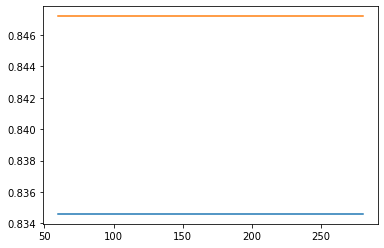

In [74]:
Main_frame,key_score,optimum_iter = optimize_max_iter(50,300)

In [75]:
Iter_values_frame=Main_frame.sort_values(ascending=True,by="Test Scores")
Iter_values_frame

,Iterations,Test Scores,Train Scores
0,60,0.8346,0.8472
1,80,0.8346,0.8472
2,100,0.8346,0.8472
3,120,0.8346,0.8472
4,140,0.8346,0.8472
5,160,0.8346,0.8472
6,180,0.8346,0.8472
7,200,0.8346,0.8472
8,220,0.8346,0.8472
9,240,0.8346,0.8472


In [76]:
def optimize_c_values(C_list):
    test_score=[]
    train_score=[]
    C_Values=C_list
    optimum_C=0
    key_score=0
    for i in C_list:
        #key=i*1000
        #if key%10==0:
        logistic_model = LogisticRegression(max_iter=200, C=i)
        logistic_model.fit(x_train, y_train)
        test_accuracy=logistic_model.score(x_test,y_test)
        train_accuracy=logistic_model.score(x_train,y_train)
        test_score.append(logistic_model.score(x_test,y_test))
        train_score.append(logistic_model.score(x_train,y_train))
        #iterations.append(i)
        if test_accuracy>key_score:
            optimum_C=i
            key_score=test_accuracy
        else:
            continue
    train_test_frame = pd.DataFrame({"Test Scores": test_score,"Train Scores":train_score})
    #train_test_frame.plot()
    Main_frame = pd.DataFrame({"C_Values":C_Values,"Test Scores": test_score,"Train Scores":train_score})
    plt.plot(C_Values,test_score, label="Test Scores")
    plt.plot(C_Values,train_score, label="Train Scores")
    #plt.xlabel("C Values")
    #plt.ylabel("Accuracies")
    #train_test_frame.plot()
    plt.legend()
    plt.show()
    print("Optimum Score:",key_score,"The C Number:",optimum_C)
    return Main_frame,key_score,optimum_C

In [77]:
c_values = [100000,1000,100, 10, 1.0, 0.1, 0.01]

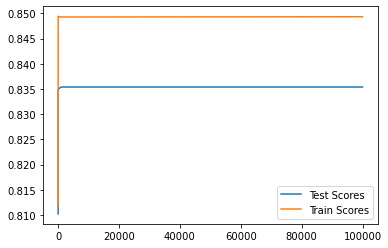

Optimum Score: 0.8354 The C Number: 100000


In [78]:
Main_frame,key_score,optimum_C = optimize_c_values(c_values)

In [79]:
C_values_frame=Main_frame.sort_values(ascending=False,by="Test Scores")
C_values_frame

,C_Values,Test Scores,Train Scores
0,100000.00,0.8354,0.84935
1,1000.00,0.8354,0.84930
2,100.00,0.8350,0.84935
3,10.00,0.8348,0.84945
4,1.00,0.8346,0.84720
5,0.10,0.8332,0.83590
6,0.01,0.8102,0.81180


### KNN k Parameter Optmization

* To work faster, less data is used.

* Choosing a large k value leads to high bias by classifying everything as the more probable class. As a result, we have a smooth decision boundary between the classes, with less emphasis on individual points.

* Conversely, small k values cause high variance and an unstable output. Minor changes in the training set cause large changes in classification boundaries. The effect is more visible on intersecting classes:

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['review'].iloc[:5000]
y = data['sentiment'].iloc[:5000]
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [81]:
def optimize_k_values(upper,lower):
    test_score=[]
    train_score=[]
    k_values=[]
    optimum_C=0
    key_score=0
    for i in range(upper,lower):
        key=i
        if key%1==0:
            knn_model=KNeighborsClassifier(n_neighbors=i)
            knn_model.fit(x_train,y_train)
            test_accuracy=knn_model.score(x_test,y_test)
            train_accuracy=knn_model.score(x_train,y_train)
            test_score.append(knn_model.score(x_test,y_test))
            train_score.append(knn_model.score(x_train,y_train))
            k_values.append(i)
            if test_accuracy>key_score:
                optimum_k=i
                key_score=test_accuracy
        else:
            continue
    train_test_frame = pd.DataFrame({"Test Scores": test_score,"Train Scores":train_score})
    #train_test_frame.plot()
    Main_frame = pd.DataFrame({"k_Values":k_values,"Test Scores": test_score,"Train Scores":train_score})
    plt.plot(k_values,test_score, label="Test Scores")
    plt.plot(k_values,train_score, label="Train Scores")
    #plt.xlabel("C Values")
    #plt.ylabel("Accuracies")
    #train_test_frame.plot()
    plt.legend()
    plt.show()
    print("Optimum Score:",key_score,"The k Number:",optimum_k)
    return Main_frame,key_score,optimum_k

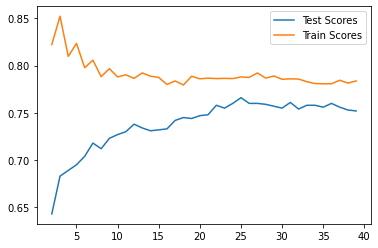

Optimum Score: 0.766 The k Number: 25


In [82]:
Main_frame,key_score,optimum_k = optimize_k_values(2,40)

In [83]:
k_values_frame=Main_frame.sort_values(ascending=False,by="Test Scores")
k_values_frame

,k_Values,Test Scores,Train Scores
23,25,0.766,0.78800
29,31,0.761,0.78600
25,27,0.760,0.79225
22,24,0.760,0.78625
34,36,0.760,0.78075
24,26,0.760,0.78750
26,28,0.759,0.78675
32,34,0.758,0.78100
31,33,0.758,0.78300
20,22,0.758,0.78625


### SVM Hyperparameter Optimization

* **Kernels**: The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.

* **C (Regularisation)**: C is the penalty parameter, inverse of regularization strength; must be a positive float. It represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.

* **Gamma**: It defines how far influences the calculation of plausible line of separation. when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

* Tunning Hyperparemeters for SVM is handled with using GridSearch method of Scikit Learn Library. 

* To work faster, less data is used.

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['review'].iloc[:5000]
y = data['sentiment'].iloc[:5000]
tfidf = TfidfVectorizer(max_features=300)
X = tfidf.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [86]:
#from sklearn.svm import SVC
grid = GridSearchCV(clf,parameters,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.3s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   3.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   3.2s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   3.2s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   3.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   3.1s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   2.9s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   2.8s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.8s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   1.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [87]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


### Results After HyperParameter Optimization

In [88]:
vectorizer = TfidfVectorizer(max_features=5000) # for default Unable to allocate 77.6 GiB for an array with shape (50000, 208350) and data type float64
reviews = list(data['review'])                  # so set max_feature 
labels = data['sentiment']

tfidf_reviews = vectorizer.fit_transform(reviews)

In [89]:
tfidf_array = tfidf_reviews.toarray()
print("Shape of the array:",tfidf_array.shape)

Shape of the array: (50000, 5000)


In [90]:
from sklearn.decomposition import PCA
NUM_COMPONENTS = 300
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit_transform(tfidf_array)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(reduced, labels, test_size = 0.2, random_state=42)

In [92]:
logistic_model = LogisticRegression(max_iter=200,C=10)
logistic_model.fit(x_train, y_train)
logistic_model.score(x_test,y_test),logistic_model.score(x_train,y_train)

(0.871, 0.8744)

In [93]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)
#confusion_matrix(y_test,y_pred)
knn.score(x_test,y_test), knn.score(x_train,y_train)

(0.7503, 0.787425)

In [94]:
from sklearn import svm


clf = svm.SVC(C=1,gamma=1)
clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#confusion_matrix(y_test,y_pred)
clf.score(x_test,y_test), clf.score(x_train,y_train)

(0.8738, 0.890675)

### Logistic Regression With Hand Coded Model Implementation

### What the Logistic Model will do step by step?

#####  PART 1

* 1)First initialize parameters, weights and bias.
* 2)Do matrix multiplication with x_train, meaning multiply each feature with an initialized weight and add bias term

* 3) Put all matrix multiplication values ( values should be equal to number of review so each review has an valu of matrix multiplication.) into sigmoid function. Sigmoid function gives probablistic value. If values > 0.5 then it says positive, lower than < 0.5 says negative.

* 4) Compare with true y_train values and find the cost using loss function.

##### PART 2 

* 5) Update weight and bias so that the costs will decrease. 

* 6) Updating parameters part need so much work, defining loss function, finding derivative, determining learning rate, iterations etc..

* 7) Do this 5 steps with a specified number of iterations.


#### PART 1 is the Forward Propagation in general.

* z = (w.T)x_train + b => in this equation we know x that is reivew array, we know w (weights) and b (bias. 
* Then we put z into sigmoid function that returns y_head(probability). 
* Then we calculate loss(error) function. 
* Cost function is summation of all loss(error).

In [95]:
X = data['review'].iloc[:3000]
y = data['sentiment'].iloc[:3000]

In [97]:
#y

In [98]:

from sklearn.feature_extraction.text import CountVectorizer
 


vectorizer = CountVectorizer()
 
vectorizer.fit(X)
X = vectorizer.transform(X)

In [99]:
y=y.to_numpy()
y.shape

(3000,)

In [100]:
X_frame=pd.DataFrame.sparse.from_spmatrix(X)
X_frame

,0,1,2,3,4,5,6,7,8,9,...,36509,36510,36511,36512,36513,36514,36515,36516,36517,36518
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = X_frame.to_numpy()

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [103]:
x_train.shape

(2400, 36519)

In [104]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [105]:
# to be with same dimensions in the following functions.
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
y_train.shape,y_test.shape,x_train.shape,x_test.shape

((1, 2400), (1, 600), (36519, 2400), (36519, 600))

In [106]:
def initialize_weight_and_bias(dimension):
    #dimension is the number of features. We need the same number of weights as the features are.
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [107]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [108]:
def loss_cost(y_head,y_train):
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

In [109]:
def forward_propagate(w,b,x_train,y_train):
    z = np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    cost = loss_cost(y_head,y_train)
    return cost,y_head,z

In [110]:
def calculate_gradients_after_forward(w,b,x_train,y_train):# BACKWARD PROPAGATION
    cost,y_head,z = forward_propagate(w,b,x_train,y_train)
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [111]:
def update_wegihts_bias(w,b,x_train,y_train,learning_rate):
    cost,gradients=calculate_gradients_after_forward(w,b,x_train,y_train)
    # lets update
    w = w - learning_rate * gradients["derivative_weight"]
    b = b - learning_rate * gradients["derivative_bias"]
    return w,b,cost

In [115]:
def do_recursively(w,b,x_train,y_train,learning_rate,num_of_iteration):
    cost_list=[]
    cost_list2=[]
    index = []
    for i in range(num_of_iteration):
        w,b,cost = update_wegihts_bias(w,b,x_train,y_train,learning_rate)
        cost_list.append(cost)
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    #plt.xlabel("Number of Iteration")
    #plt.ylabel("Cost")
    plt.show()
    return parameters,cost_list

In [113]:
 # prediction
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
   
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


Cost after iteration 0: 0.886342
Cost after iteration 10: 0.619592
Cost after iteration 20: 0.569981
Cost after iteration 30: 0.533491
Cost after iteration 40: 0.504976
Cost after iteration 50: 0.481695
Cost after iteration 60: 0.462077
Cost after iteration 70: 0.445153
Cost after iteration 80: 0.430288
Cost after iteration 90: 0.417045
Cost after iteration 100: 0.405111
Cost after iteration 110: 0.394258
Cost after iteration 120: 0.384309
Cost after iteration 130: 0.375129
Cost after iteration 140: 0.366611
Cost after iteration 150: 0.358670
Cost after iteration 160: 0.351235
Cost after iteration 170: 0.344248
Cost after iteration 180: 0.337661
Cost after iteration 190: 0.331433


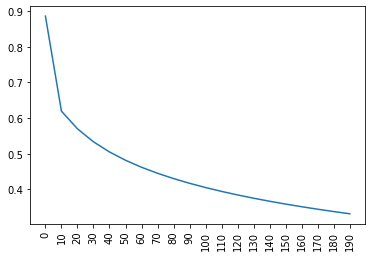

train accuracy: 91.33333333333333 %
test accuracy: 81.0 %


In [116]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    
    dimension =  x_train.shape[0]  # that is 19000
    w,b = initialize_weight_and_bias(dimension) #initialize_weights_and_bias(dimension)
    
    parameters, cost_list = do_recursively(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, num_iterations = 200)